### Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from src import code_simulator, code, noise, recovery

### Parameters

In [2]:
rotation_symmetries = [2, 3, 4]
loss_noise_values = [0.1, 0.01, 0.001, 0.0001]
number_of_filled_levels_values = range(1, 20)

### Fidelities of Trivial Code

In [3]:
trivial_fidelities = [code_simulator.get_fidelity_of_code_under_loss_noise(code.trivial_code, loss_noise_amount, False) for loss_noise_amount in loss_noise_values]

### Fidelities of Binomial Code

This will take forever to run on the first time because it needs to calculate a lot of stuff, but subsequent runs should be near instantaneous because all the calculation values are saved to files.

In [4]:
%%time

binomial_fidelities = np.zeros((len(rotation_symmetries), len(loss_noise_values), len(number_of_filled_levels_values), 2))
binomial_photon_numbers = np.zeros((len(rotation_symmetries), len(number_of_filled_levels_values)))
for i, rotation_symmetry in enumerate(rotation_symmetries):
    for j, loss_noise_amount in enumerate(loss_noise_values):
        for k, number_of_filled_levels in enumerate(number_of_filled_levels_values):
            binomial_code = code.get_binomial_code(rotation_symmetry, number_of_filled_levels, (number_of_filled_levels + 2) * rotation_symmetry)
            binomial_fidelities[i,j,k,0] = code_simulator.get_fidelity_of_code_under_loss_noise(binomial_code, loss_noise_amount, False)
            binomial_fidelities[i,j,k,1] = code_simulator.get_fidelity_of_code_under_loss_noise(binomial_code, loss_noise_amount, True)
            binomial_photon_numbers[i,k] = 0 # TODO

CPU times: user 133 ms, sys: 21.1 ms, total: 154 ms
Wall time: 159 ms


### Plots of Error Rates vs. Average Number

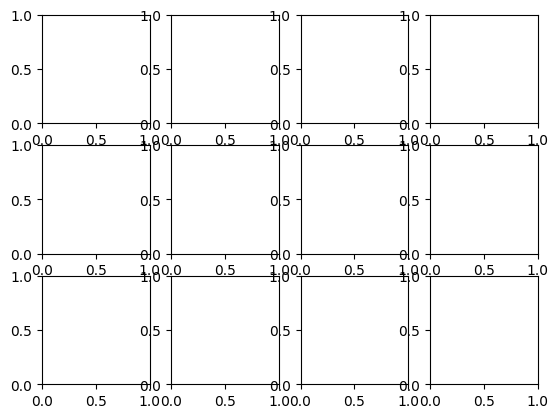

In [5]:
fig, axs = plt.subplots(len(rotation_symmetries), len(loss_noise_values))
# TODO